In [1]:
# Please do not edit this part
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(41)
# Please do not edit this part

### Important Note

For ease of submission, we suggest downloading a PDF of your notebook and merging it with a PDF of your written/typed work, using platforms such as [smallpdf](www.smallpdf.com), [sodapdf](www.sodapdf.com), [combinedpdf](www.combinedpdf.com), etc. and then assigning only the part of the PDF containing the plot for question 4e ie. please **don't** assign the entire notebook PDF for question 4e. In addition to the figure from the [Make a Plot](#Make-a-Plot), answer the following 2 questions listed in the main assignment and include your answers in your submission for Question 4e:
- In your plot, does the simple linear regression model without an intercept term have the same slope as the model with an intercept term?
- Describe one shortcoming for a simple linear regression model without an intercept term.


## Question 4e

Now that you have done some analysis on whether some of the properties still hold for a simple linear regression model without an intercept term, let's actually run a simulation to confirm our findings. 

Complete the following the functions and statements to plot a graph of the simple linear regression model with an intercept term v.s. one without an intercept term. 

The slope ($\hat{\gamma}$) of your fitted line (without the intercept term) should be defined based on what you have shown in question 3:
$$
\hat{\gamma} = \frac{\sum x_i y_i}{\sum x_i^2}
$$


In [2]:
# This function helps generate a synthesized dataset based on a given gamma value
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    return X, Y

Run the cell below to generate the synthesized dataset.

In [3]:
dataset = generate_dataset(gamma=10)
X, Y = dataset

Complete the following function `calculate_gamma` that computes the value of the slope for your model based on whether or not an intercept term is specified within the model.

**Hint**: To calculate the slope for your simple linear regression model **when it has an intercept term**, check out the function [np.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

In [18]:
def calculate_gamma(X, Y, with_intercept):
    if with_intercept:
        gamma_hat = np.corrcoef(X,Y)[1,0] * np.std(Y) / np.std(X)
    else:
        gamma_hat = sum(X*Y) / sum(X**2)
    return gamma_hat

Complete the following function `linear_model` that outputs a predicted value from your simple linear regression model based on whether or not an intercept is specified within the model.

In [19]:
def linear_model(x, gamma, intercept, with_intercept):
    if with_intercept:
        Y_hat = [i + intercept for i in (gamma * x)]
    else:
        Y_hat = gamma * x
    return Y_hat

In [20]:
# Compute the estimated slope with & without an intercept
gamma_with_intercept = calculate_gamma(X, Y, with_intercept=True)
gamma_without_intercept = calculate_gamma(X, Y, with_intercept=False)

# Compute the estimtaed intercept
intercept_hat = np.mean(Y) - gamma_with_intercept * np.mean(X)

# Compute the predicted y values using a simple linear regression model with & without an intercept
Y_hat_with_intercept = linear_model(X, gamma_with_intercept, intercept_hat, True)
Y_hat_without_intercept = linear_model(X, gamma_without_intercept, intercept_hat, False)

# Compute the residual vector for all of the predicted y values from the model without an intercept
residual_without_intercept = Y - Y_hat_without_intercept

### A Quick Numerical Check
In parts 4a, 4b, and 4c, you have answered a few True/False questions about whether certain properties still hold for the simplified linear regression model without an intercept term. Now would be a great opportunity for you to actually numerically check if the synthesized dataset empirically agrees with your answers to the earlier parts of this question.

Run through the following few cells and see if it matches what you originally expected.

#### Proposed statement from 4a

$$\sum_{i=1}^n e_i = 0$$

In [7]:
np.isclose(np.sum(residual_without_intercept), 0)

False

#### Proposed statement from 4b

The column vector $\vec{x}$ and the residual vector $e$ are orthogonal.

In [8]:
np.isclose(np.sum(X * residual_without_intercept), 0)

True

#### Proposed statement from 4c

The predicted response vector $\hat{\mathbb{Y}}$ and the residual vector $e$ are orthogonal.

In [9]:
np.isclose(np.sum(Y_hat_without_intercept * residual_without_intercept), 0)

True

### Make a Plot

Finally, let's create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

You should also mark the point $(\bar{x}, \bar{y})$ in your plot with a different marker style, color, or size. 

**Note**: As a reminder, $\bar{x}$ represents the average of all of the $x$ values in our observed data. The same goes for $\bar{y}$.

Text(0, 0.5, 'y')

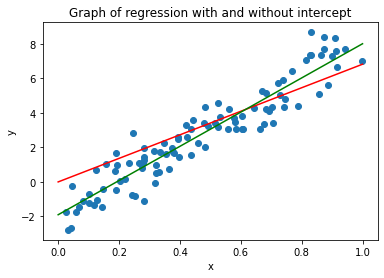

In [22]:
plt.scatter(X,Y)
x = np.linspace(0,1,100)
y = gamma_without_intercept * x
plt.plot(x,y,'-r', label='without intercept')
x = np.linspace(0,1,100)
y = intercept_hat + gamma_with_intercept * x
plt.plot(x,y,'-g', label='with intercept')
plt.title('Graph of regression with and without intercept')
plt.xlabel('x')
plt.ylabel('y')